### Importing Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
df = pd.read_csv(r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Intro to Machine Learning\Data Sets\Dataset-weather-prediction-dataset-processed_scaled.csv', index_col= 0)

In [4]:
pleasant = pd.read_csv(r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Intro to Machine Learning\Data Sets\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

In [5]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.707663,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,-1.707657,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,-1.707652,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.707646,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,-1.707641,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [6]:
pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Re-adding unscaled date to df

In [8]:
df = df.drop(['DATE','MONTH'], axis=1)

In [9]:
df.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,-0.462450,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,-0.186545,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,-0.385810,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,-1.075573,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [10]:
df_noscale = pd.read_csv(r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Intro to Machine Learning\Data Sets\Dataset-weather-prediction-dataset-processed.csv')

In [11]:
df = pd.concat([df_noscale['DATE'],df], axis=1)

In [12]:
df.head()

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


### Selecting only 1990

In [14]:
df1990 = df[df['DATE'].astype(str).str.contains('1990')] #<-----INSERT YEAR HERE
df1990

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
10958,19900101,-2.248803,-0.027930,0.645423,0.563561,-0.800359,-0.445514,-0.179228,0.604953,-1.696559,...,-1.670486,-0.081896,-0.693801,-1.100962,0.112794,-0.024706,-0.438820,-1.148890,-0.929656,-1.183606
10959,19900102,-1.417570,-0.027930,0.735760,0.884527,-0.929233,-0.445514,-0.179228,-0.531750,-1.655817,...,-0.443701,-0.503721,-0.954822,-1.089181,1.260825,-0.024706,-1.009500,-1.028721,-0.875001,-1.039817
10960,19900103,1.076130,-0.027930,1.187444,0.777538,-1.229941,-0.445514,-0.179228,-1.065304,-1.710140,...,-1.057093,1.042971,-0.451424,-0.888897,-0.490810,-0.024706,0.432219,-0.878510,-0.847674,-0.809753
10961,19900104,-1.417570,-0.027930,0.103401,1.297196,-0.864796,-0.445514,-0.179228,0.233784,-1.506430,...,0.169692,1.464796,-0.283624,-1.183432,0.598044,-0.024706,-1.039536,-1.269058,-1.612845,-0.723479
10962,19900105,0.660514,-0.027930,0.464749,1.618161,-1.197722,-0.365351,-0.179228,-1.018908,-1.411366,...,-1.057093,1.183580,-0.320913,-1.100962,0.171971,-0.024706,-0.679106,-0.397835,-0.191813,-0.522173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11318,19901227,0.660514,5.705005,-0.348283,-0.949560,-1.079587,-0.205026,-0.179228,-0.694136,-0.515042,...,0.169692,-1.347371,-0.721768,-1.018492,0.811081,-0.024706,-0.588999,-0.998679,-1.148277,-1.528702
11319,19901228,-1.001953,0.791061,-0.438620,0.471857,-0.800359,-0.405433,-0.179228,0.465765,-0.895301,...,0.783085,0.058712,-1.961620,-1.136306,0.834752,-0.024706,-0.769214,-0.788384,-0.875001,-0.550931
11320,19901229,0.660514,3.794027,-0.528957,-0.261778,-1.272899,0.576562,-0.179228,-1.042106,-0.012558,...,0.169692,-1.066155,-1.775176,-1.136306,0.716398,-0.024706,-1.009500,-1.899944,-1.312242,-1.816282
11321,19901230,1.076130,1.337054,-0.167609,0.624698,-1.315857,0.576562,-0.179228,-1.065304,0.218313,...,-0.443701,-0.644330,-0.814989,-1.006711,0.811081,-0.024706,-0.138462,-1.779775,-1.722155,-1.586218


In [15]:
df1990.columns.tolist()

['DATE',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDOR

In [16]:
# going to look at Budapest and Madrid in the 90s
budmad90 = df1990[
['BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max']]

### Dendrograms 1990 Budapest/Madrid

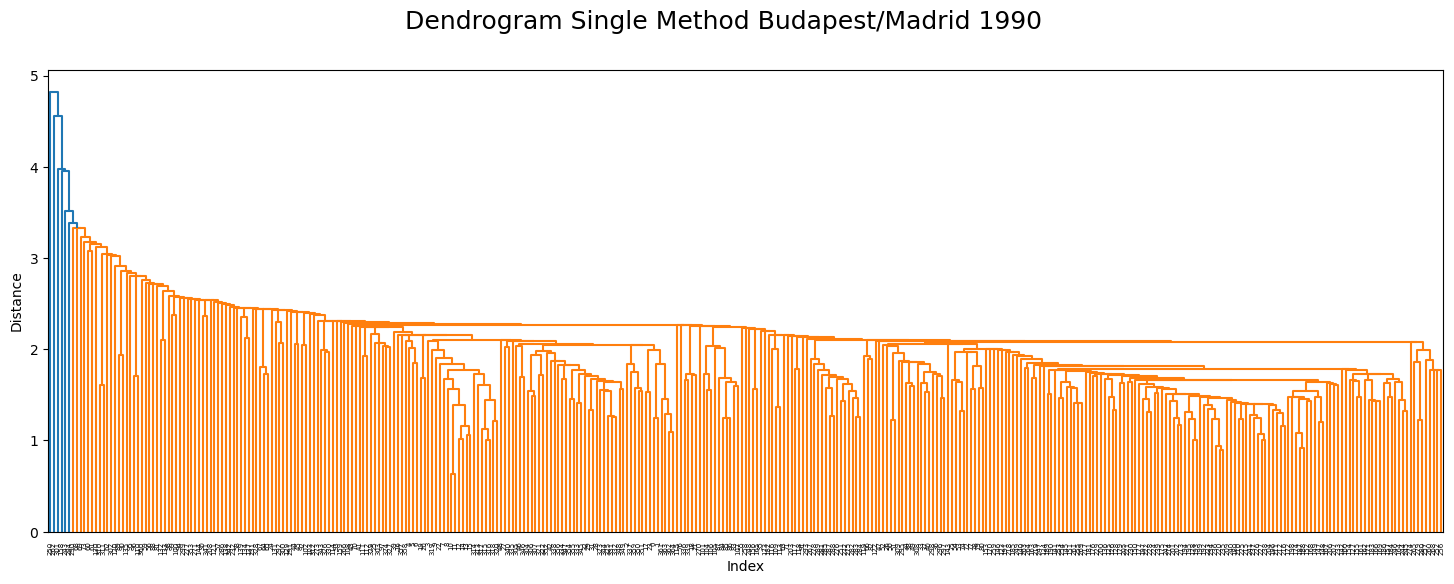

In [18]:
distance_single = linkage(budmad90, method='single') 
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method Budapest/Madrid 1990",fontsize=18)
plt.show()

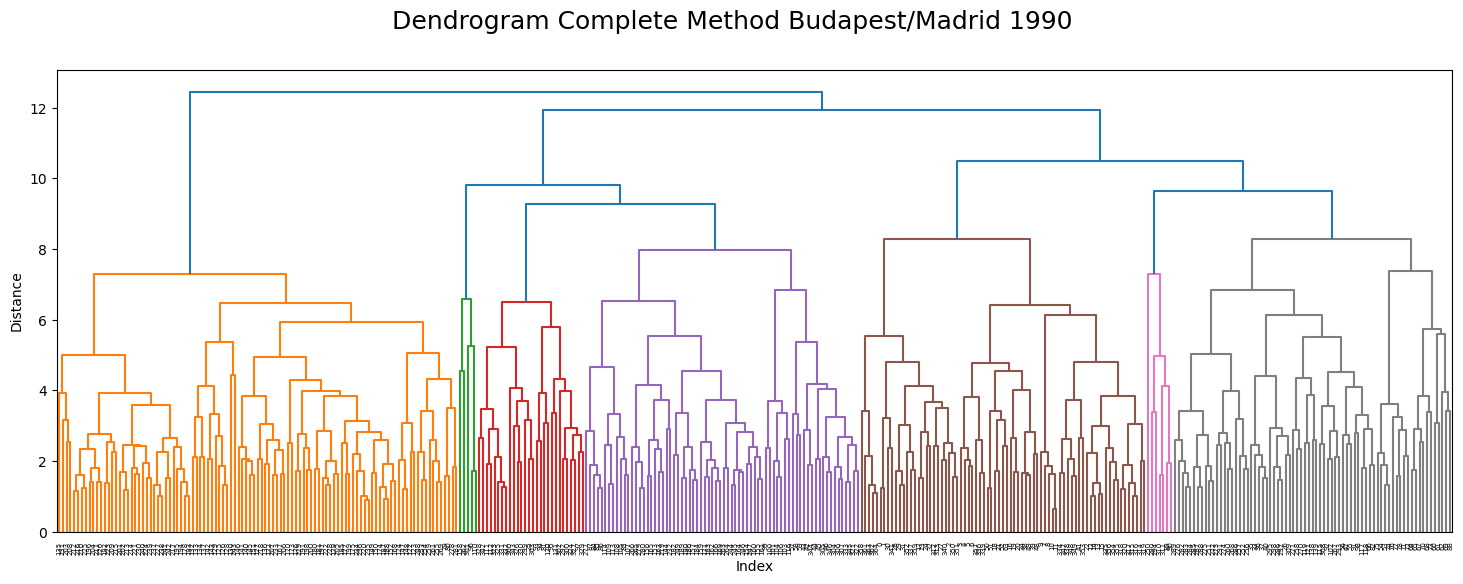

In [19]:
distance_complete = linkage(budmad90, method='complete') 
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method Budapest/Madrid 1990",fontsize=18)
plt.show()

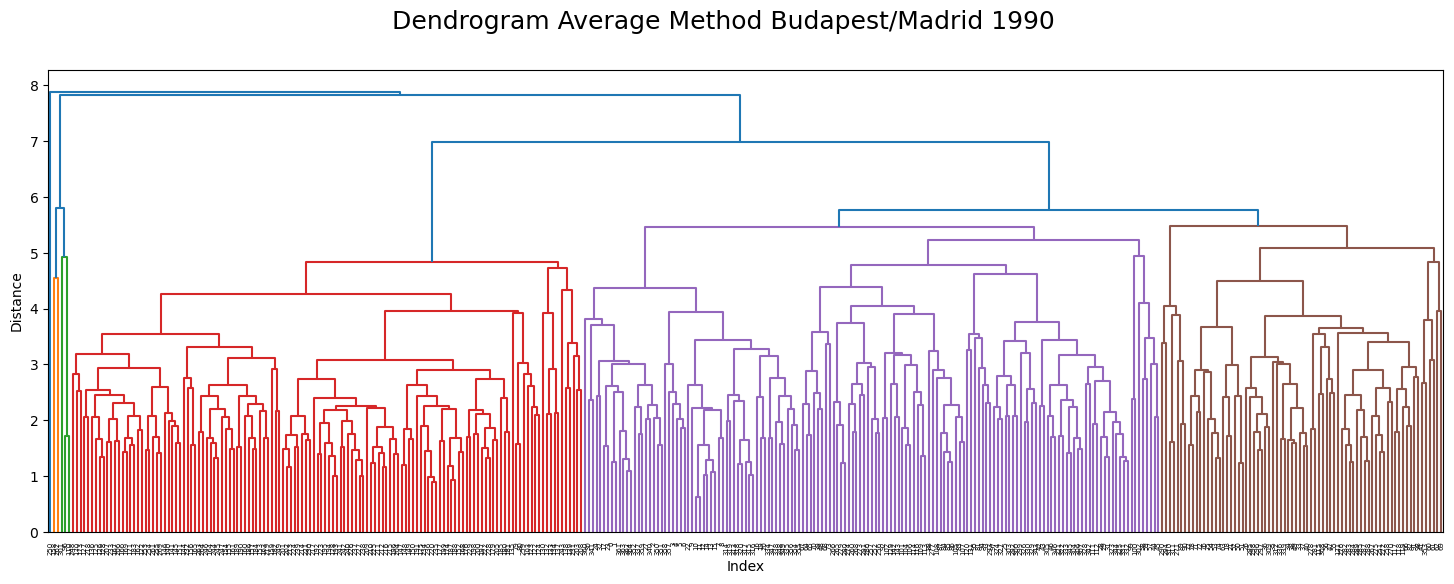

In [20]:
distance_average = linkage(budmad90, method='average') 
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method Budapest/Madrid 1990",fontsize=18)
plt.show()

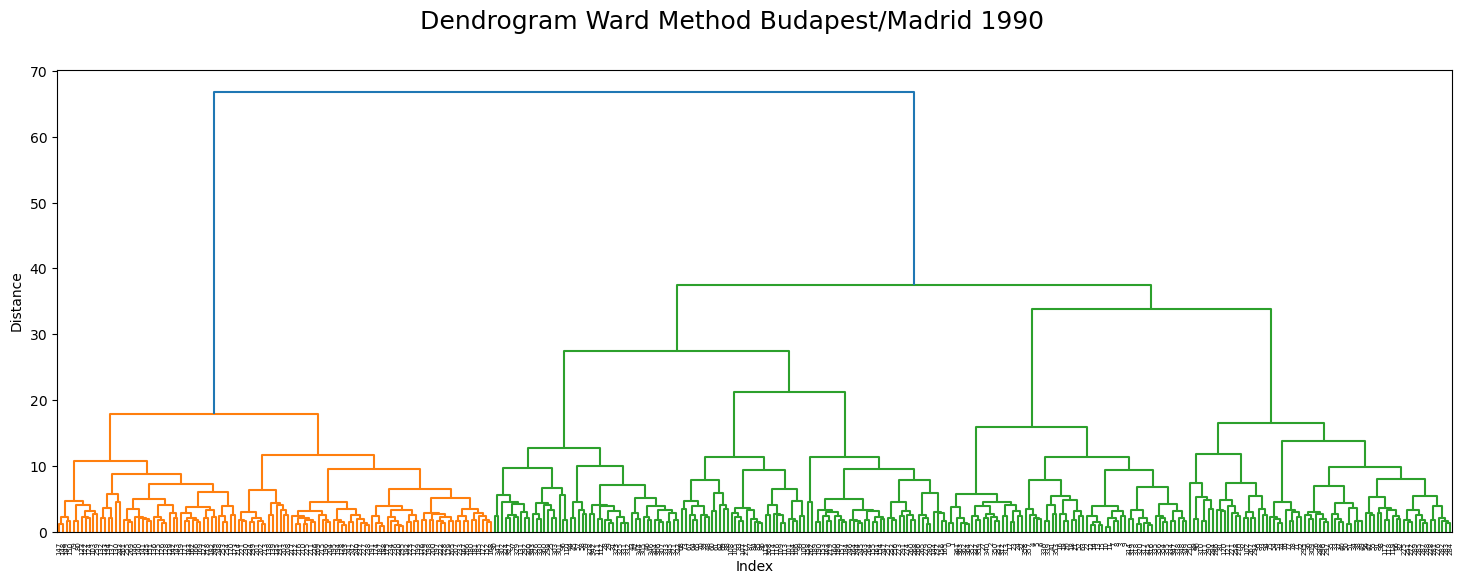

In [21]:
distance_ward = linkage(budmad90, method='ward') 
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method Budapest/Madrid 1990",fontsize=18)
plt.show()

### Dendrograms All Stations 1990

In [23]:
df1990.drop('DATE', axis=1)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
10958,-2.248803,-0.027930,0.645423,0.563561,-0.800359,-0.445514,-0.179228,0.604953,-1.696559,-1.520087,...,-1.670486,-0.081896,-0.693801,-1.100962,0.112794,-0.024706,-0.438820,-1.148890,-0.929656,-1.183606
10959,-1.417570,-0.027930,0.735760,0.884527,-0.929233,-0.445514,-0.179228,-0.531750,-1.655817,-1.566071,...,-0.443701,-0.503721,-0.954822,-1.089181,1.260825,-0.024706,-1.009500,-1.028721,-0.875001,-1.039817
10960,1.076130,-0.027930,1.187444,0.777538,-1.229941,-0.445514,-0.179228,-1.065304,-1.710140,-1.612055,...,-1.057093,1.042971,-0.451424,-0.888897,-0.490810,-0.024706,0.432219,-0.878510,-0.847674,-0.809753
10961,-1.417570,-0.027930,0.103401,1.297196,-0.864796,-0.445514,-0.179228,0.233784,-1.506430,-1.443447,...,0.169692,1.464796,-0.283624,-1.183432,0.598044,-0.024706,-1.039536,-1.269058,-1.612845,-0.723479
10962,0.660514,-0.027930,0.464749,1.618161,-1.197722,-0.365351,-0.179228,-1.018908,-1.411366,-1.443447,...,-1.057093,1.183580,-0.320913,-1.100962,0.171971,-0.024706,-0.679106,-0.397835,-0.191813,-0.522173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11318,0.660514,5.705005,-0.348283,-0.949560,-1.079587,-0.205026,-0.179228,-0.694136,-0.515042,-0.692371,...,0.169692,-1.347371,-0.721768,-1.018492,0.811081,-0.024706,-0.588999,-0.998679,-1.148277,-1.528702
11319,-1.001953,0.791061,-0.438620,0.471857,-0.800359,-0.405433,-0.179228,0.465765,-0.895301,-0.723027,...,0.783085,0.058712,-1.961620,-1.136306,0.834752,-0.024706,-0.769214,-0.788384,-0.875001,-0.550931
11320,0.660514,3.794027,-0.528957,-0.261778,-1.272899,0.576562,-0.179228,-1.042106,-0.012558,-0.370482,...,0.169692,-1.066155,-1.775176,-1.136306,0.716398,-0.024706,-1.009500,-1.899944,-1.312242,-1.816282
11321,1.076130,1.337054,-0.167609,0.624698,-1.315857,0.576562,-0.179228,-1.065304,0.218313,0.303953,...,-0.443701,-0.644330,-0.814989,-1.006711,0.811081,-0.024706,-0.138462,-1.779775,-1.722155,-1.586218


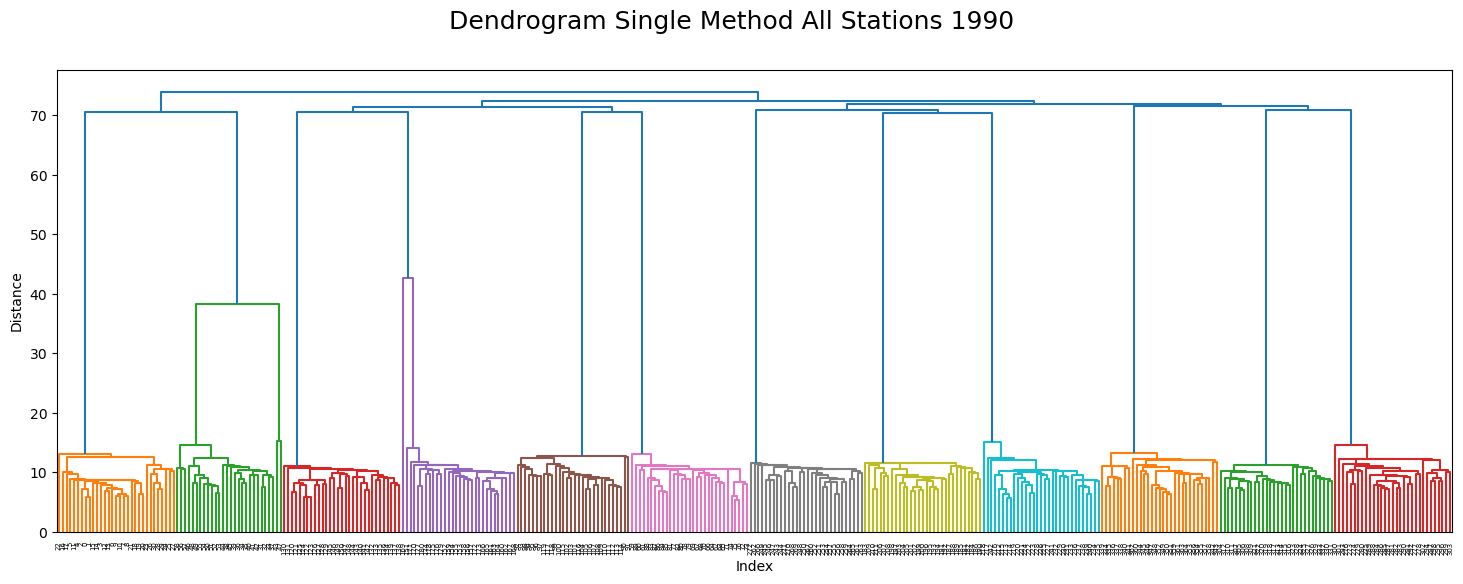

In [24]:
dist_single = linkage(df1990, method='single') 
plt.figure(figsize=(18,6))
dendrogram(dist_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method All Stations 1990",fontsize=18)
plt.show()

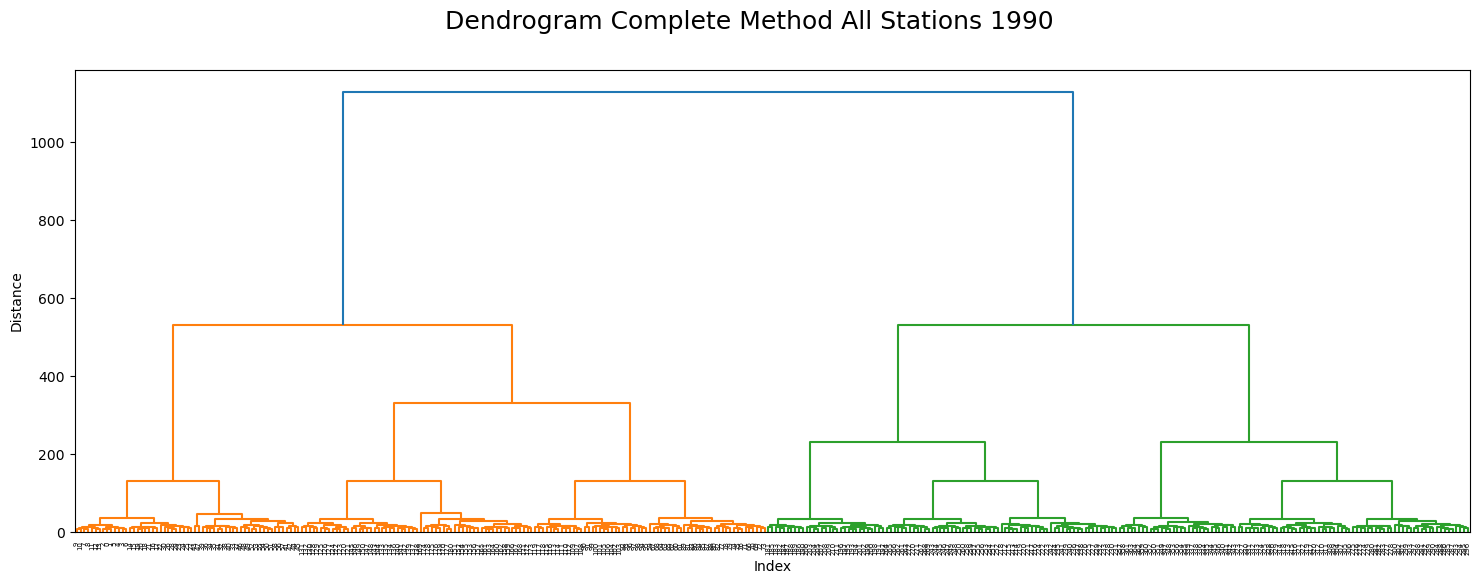

In [25]:
dist_complete = linkage(df1990, method='complete') 
plt.figure(figsize=(18,6))
dendrogram(dist_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method All Stations 1990",fontsize=18)
plt.show()

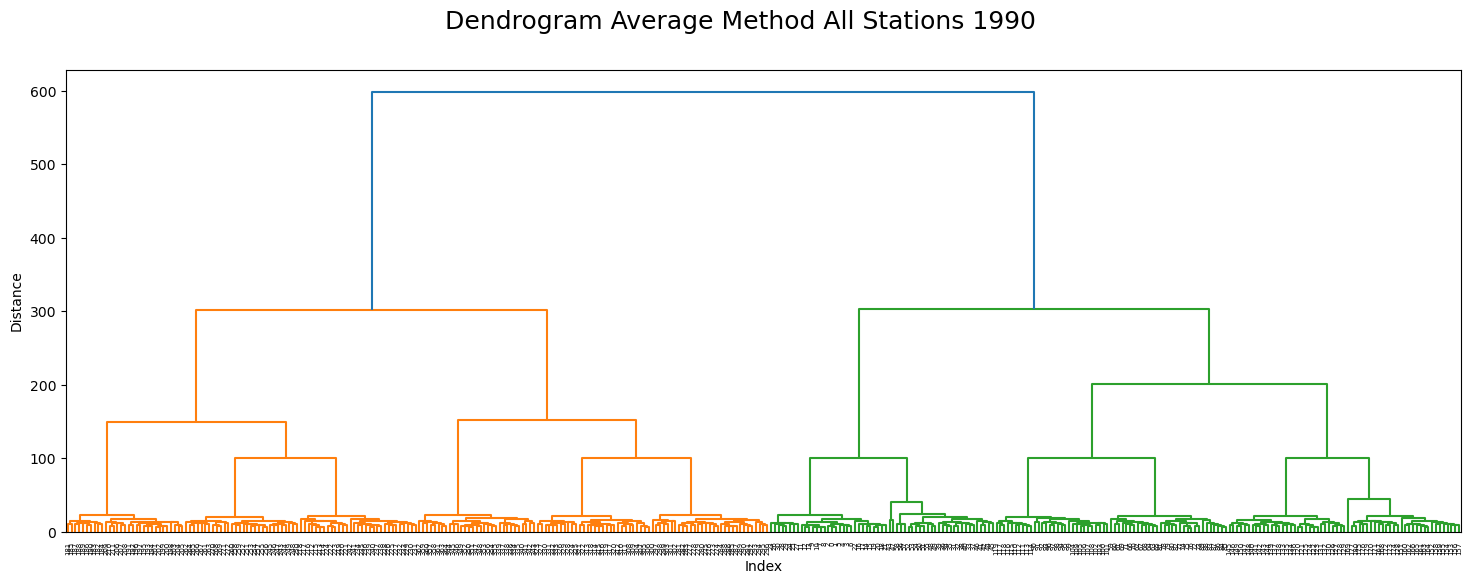

In [26]:
dist_average = linkage(df1990, method='average') 
plt.figure(figsize=(18,6))
dendrogram(dist_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method All Stations 1990",fontsize=18)
plt.show()

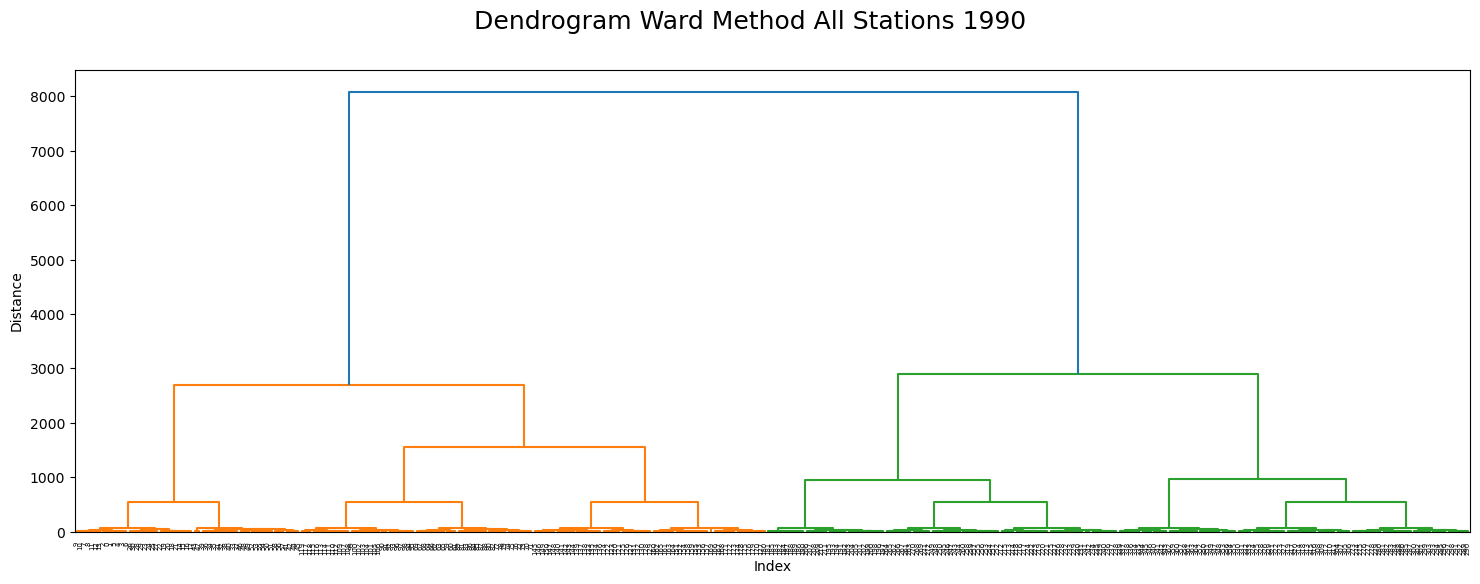

In [27]:
dist_ward = linkage(df1990, method='ward') 
plt.figure(figsize=(18,6))
dendrogram(dist_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method All Stations 1990",fontsize=18)
plt.show()